# Process

Load a big data set, intersect, and save out in a simple CSV format.

The input file is a copy of the total dataset I have obtained from a colleague: it was downloaded before the geocoding changed, and gives data from 2014 until 2010.  (Before that it is unfortunately corrupted.)

In [1]:
import sys, os.path
sys.path.insert(0, os.path.abspath(os.path.join("..", "..")))

In [2]:
import open_cp.sources.chicago as chicago
import open_cp.geometry

In [8]:
#datadir = os.path.join("//media", "disk", "Data")
datadir = os.path.abspath(os.path.join("..", "..", "..", "..", "..", "Data"))
chicago.set_data_directory(datadir)

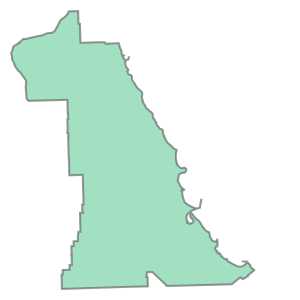

In [9]:
south_side = chicago.get_side("South")
south_side

# Use the library

In [5]:
points = chicago.load(os.path.join(datadir, "chicago_all_old.csv"), {"BURGLARY"}, type="all")
points = open_cp.geometry.intersect_timed_points(points, south_side)

In [6]:
points.number_data_points

13803

In [7]:
filename = os.path.join(datadir, "chicago_old_burglary_simple.csv")
with open(filename, "wt", encoding="UTF8") as file:
    import csv
    writer = csv.writer(file)
    writer.writerow(["Timestamp", "X", "Y"])
    for times, x, y in zip(points.timestamps, points.xcoords, points.ycoords):
        writer.writerow([times, x, y])

# Manually

In [33]:
import csv
import shapely.geometry

def in_region(row):
    if row[15] == "":
        return False
    x = float(row[15]) / chicago._FEET_IN_METERS
    y = float(row[16]) / chicago._FEET_IN_METERS
    pt = shapely.geometry.Point((x,y))
    if south_side.intersects(pt):
        return True
    return False

desc_index = 5
wanted_desc = { "BURGLARY" }

data = []
with open(os.path.join(datadir, "chicago_all_old.csv"), "rt", encoding="UTF8") as file:
    reader = csv.reader(file)
    header = next(reader)
    for row in reader:
        if row[desc_index] in wanted_desc and in_region(row):
            data.append(row)


In [35]:
filename = os.path.join(datadir, "chicago_old_burglary_simple.csv")
with open(filename, "wt", encoding="UTF8", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)
    for row in data:
        writer.writerow(row)